In [2]:
# Importing the necessary Packages
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# loading the data
nobel = pd.read_csv("nobel.csv")
nobel.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
# Check the structure of the data
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [5]:
# Transform the "birth_date" to a date type
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format="%Y-%m-%d", errors = "coerce")
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  1000 non-null   int64         
 1   category              1000 non-null   object        
 2   prize                 1000 non-null   object        
 3   motivation            912 non-null    object        
 4   prize_share           1000 non-null   object        
 5   laureate_id           1000 non-null   int64         
 6   laureate_type         1000 non-null   object        
 7   full_name             1000 non-null   object        
 8   birth_date            956 non-null    datetime64[ns]
 9   birth_city            964 non-null    object        
 10  birth_country         969 non-null    object        
 11  sex                   970 non-null    object        
 12  organization_name     736 non-null    object        
 13  organization_city  

In [6]:
# The most commonly awarded gender
top_gender = nobel['sex'].value_counts().index[0]
top_gender_value = nobel['sex'].value_counts().max()
print(f'The top gender is "{top_gender}" with total number of "{top_gender_value}" awards.')

The top gender is "Male" with total number of "905" awards.


In [11]:
# The most commonly awarded birth country
top_country = nobel['birth_country'].value_counts().index[0]
top_country_value = nobel['birth_country'].value_counts().max()
print(f'The top country is "{top_country}" with total number of "{top_country_value}" awards.')

The top country is "United States of America" with total number of "291" awards.


In [12]:
# Create a decade column
nobel['decade'] = ((nobel['year'] // 10) * 10).astype(int)

# Check US winners*
nobel.groupby('decade')['birth_country'].apply(lambda x: (x == 'United States of America'))

decade     
1900    0      False
        1      False
        2      False
        3      False
        4      False
               ...  
2020    995     True
        996    False
        997    False
        998    False
        999     True
Name: birth_country, Length: 1000, dtype: bool

In [17]:
# Get the ratio of USA winners per each decade
prop_usa = round(nobel.groupby('decade')['birth_country'].apply(lambda x: (x == 'United States of America').mean()), 2)
prop_usa_winners = pd.DataFrame(prop_usa)
prop_usa_winners

,birth_country
decade,
1900,0.02
1910,0.08
1920,0.07
1930,0.25
1940,0.30
1950,0.29
1960,0.27
1970,0.32
1980,0.32


In [18]:
# Identify the decade with the highest proportion of US-born winners
print(f'The decade with the most US winners is "{prop_usa_winners.idxmax().item()}" with ratio of "{prop_usa_winners.max().item()}".')

The decade with the most US winners is "2000" with ratio of "0.42".


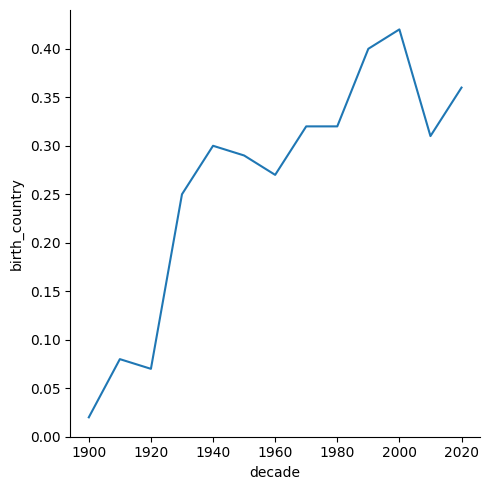

In [19]:
# Plotting USA born winners
ax1 = sns.relplot(x='decade', y='birth_country', data=prop_usa_winners, kind="line")
ax1

In [20]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
prop_fem = round(nobel.groupby(['decade', 'category'])['sex'].apply(lambda x: (x == 'Female').mean()), 2)
max_female = pd.DataFrame(prop_fem)

# Rename the proportion column as "sex_ratio"
max_female = max_female.rename(columns={'sex': 'female_proportion'})
max_female

female_proportion
decade category                     
1900   Chemistry                0.00
       Literature               0.10
       Medicine                 0.00
       Peace                    0.07
       Physics                  0.08
...                              ...
2020   Economics                0.11
       Literature               0.50
       Medicine                 0.12
       Peace                    0.29
       Physics                  0.17

[72 rows x 1 columns]

In [22]:
# The decade and Nobel Prize category with the highest proportion of female laureates
max_female_decade_category = max_female[max_female['female_proportion'] == max_female['female_proportion'].max()].reset_index()
max_fem_decade = max_female_decade_category['decade']
max_fem_cat = max_female_decade_category['category']
max_prop = max_female_decade_category['female_proportion']
print(f'"{max_fem_decade.item()}" is The decade & Nobel Prize category with the highest proportion of: ({max_prop.item()})')


"2020" is The decade & Nobel Prize category with the highest proportion of: (0.5)


In [25]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_fem_decade[0].item():max_fem_cat[0]}
max_female_dict

{2020: 'Literature'}

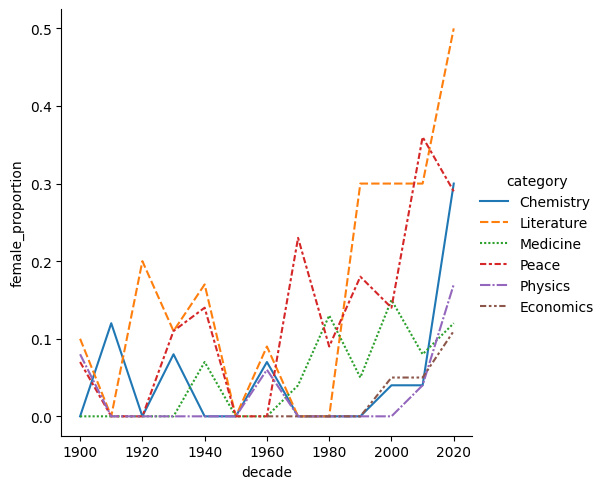

In [27]:
# Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_proportion', hue='category', data=max_female, kind="line", style='category')
ax2

In [28]:
# Filter for female winners and get the first one
first_female_winner = nobel[nobel['sex'] == 'Female'].nsmallest(1, 'year')[['year', 'category', 'sex', 'full_name']].reset_index(drop=True)
first_female_winner

,year,category,sex,full_name
0,1903,Physics,Female,"Marie Curie, née Sklodowska"


In [30]:
# set variables (first_woman_name & first_woman_category)
first_woman_name = first_female_winner['full_name'].item()
first_woman_category = first_female_winner['category'].item()
first_woman_year = first_female_winner["year"].item()

# Who was the first woman to receive a Nobel Prize, and in what category?
print(f'At {first_woman_year}, "{first_woman_name}" was the first woman to win the Nobel Prize and in "{first_woman_category}" category.')

At 1903, "Marie Curie, née Sklodowska" was the first woman to win the Nobel Prize and in "Physics" category.


In [21]:
# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts>1].index
repeat_list = list(repeats)
print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
